In [1]:
import os
# numerical computing package
import numpy as np
# 
from scipy import stats
# command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt
# matplotlib
import matplotlib
# find nearest value
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()
#
import sys
#
import pickle
#
import xarray as xr
#
from glob import glob as gb
#
import time
#
import cartopy.crs as ccrs

In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
!pwd

/home/561/erd561/CMIP5


In [4]:
figures_path = '/home/561/erd561/figures/SAMexp/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

remote_path = '/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/'

remote_path_ctrl = '/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/'



Figures will be saved in: /home/561/erd561/figures/SAMexp/s01_gfdl_diagnostics



In [5]:
%%time

from dask.distributed import Client
c = Client()
print(c)

<Client: scheduler='tcp://127.0.0.1:38618' processes=8 cores=8>
CPU times: user 732 ms, sys: 131 ms, total: 863 ms
Wall time: 3.95 s


In [6]:
# ice_daily, ice_month, ocean_bgc_2d, ocean_bgc_carbon, ocean_bgc_daily,
# ocean_bgc_npzd, ocean_cfc, ocean_force, ocean_global, ocean_month, ocean_surface

sim = np.arange(501, 526)

var = 'ice_month'

sim_path = []

for s in np.arange(477, 487):
    sim_path.append(remote_path_ctrl + 'output' + str(s) + '/' + var + '.nc')


for s in sim:
    sim_path.append(remote_path + 'output' + str(s) + '/' + var + '.nc')
    
for s in sim_path:
    print(s)
    
    
# years = np.arange(1958, 2017)
# print(years)
# var1 = 'surface'
# files1 = sorted(gb(remote_path2 + 'ocean_' + var1 + '*.nc'))
# for f in files1:
#     print(f)
# print(len(files1))

# var2 = 'force'
# files2 = sorted(gb(remote_path2 + 'ocean_' + var2 + '*.nc'))
# for f in files2:
#     print(f)
# print(len(files2))



/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output477/ice_month.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output478/ice_month.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output479/ice_month.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output480/ice_month.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output481/ice_month.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output482/ice_month.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output483/ice_month.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output484/ice_month.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output485/ice_month.nc
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output486/ice_month.nc
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output501/ice_month.nc
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output502/ice_month.nc
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output503/ice_month.nc
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output504/ice_month.nc
/g/data/

In [16]:
%%time

sst = []
# taux = []
# for f1, f2 in zip(files1, files2):
for f1 in sim_path:
    if f1 == sim_path[0]:
#         xt = \
#             xr.open_dataset(f1).\
#             xt.\
#             sel(xt=slice(100-360,170-360))
#         yt = \
#             xr.open_dataset(f1).\
#             yt.\
#             sel(yt=slice(-70,-10))
        sst = \
            xr.open_dataset(f1, decode_times=False).\
            SST.\
            mean(dim='time')
        print(str(f1) + ' OK')
        
#         xu_ocean = \
#             xr.open_dataset(f1).\
#             xu_ocean.\
#             sel(xu_ocean=slice(100-360,170-360))
#         yu_ocean = \
#             xr.open_dataset(f1).\
#             yu_ocean.\
#             sel(yu_ocean=slice(-70,-10))
#         taux = \
#             xr.open_dataset(f2).\
#             tau_x.\
#             sel(yu_ocean=slice(-70,-10), xu_ocean=slice(100-360,170-360)).\
#             mean(dim='Time')
#         print(str(f2) + ' OK')
            
    else:
        sst = \
            xr.concat([
                sst,
                xr.open_dataset(f1, decode_times=False).\
                SST.\
                mean(dim='time')
            ], 'year'
            )
        print(str(f1) + ' OK')
        
#         taux = \
#             xr.concat([ 
#                 xr.open_dataset(f2).\
#                 tau_x.\
#                 sel(yu_ocean=slice(-70,-10), xu_ocean=slice(100-360,170-360)).\
#                 mean(dim='Time'),
#                 taux
#             ], 'year'
#             )
#         print(str(f2) + ' OK')
    

print(sst.shape)
# print(taux.shape)

/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output477/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output478/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output479/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output480/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output481/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output482/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output483/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output484/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output485/ice_month.nc OK
/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output486/ice_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output501/ice_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output502/ice_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output503/ice_month.nc OK
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/

In [17]:
%%time

sst_all = sst.\
    mean(dim=('yt', 'xt'))
print(sst_all.shape)
print(sst_all)


lon_GAB = [116, 146.5]
lat_GAB = [-42.5, -30]
    
sst_GAB = \
    sst.\
    sel(yt=slice(lat_GAB[0],lat_GAB[1]), 
        xt=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
    mean(dim=('yt', 'xt'))
print(str(f1) + ' OK')

# taux_GAB_anom = \
#     taux.\
#     sel(yu_ocean=slice(lat_GAB[0],lat_GAB[1]), 
#         xu_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
#     mean(dim=('yu_ocean', 'xu_ocean')) - \
#     taux.\
#     sel(yu_ocean=slice(lat_GAB[0],lat_GAB[1]), 
#         xu_ocean=slice(lon_GAB[0]-360,lon_GAB[1]-360)).\
#     mean(dim=('yu_ocean', 'xu_ocean', 'year'))
# print(str(f2) + ' OK')
            
print(sst_GAB.shape)
print(sst_GAB)
# print(taux_GAB_anom.shape)
# print(taux_GAB_anom)


lon_TS = [146.5, 155]
lat_TS = [-45, -35]
sst_TS = \
    sst.\
    sel(yt=slice(lat_TS[0],lat_TS[1]), 
        xt=slice(lon_TS[0]-360,lon_TS[1]-360)).\
    mean(dim=('yt', 'xt'))
print(str(f1) + ' OK')
# taux_TS_anom = \
#     taux.\
#     sel(yu_ocean=slice(lat_TS[0],lat_TS[1]), 
#         xu_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
#     mean(dim=('yu_ocean', 'xu_ocean')) - \
#     taux.\
#     sel(yu_ocean=slice(lat_TS[0],lat_TS[1]), 
#         xu_ocean=slice(lon_TS[0]-360,lon_TS[1]-360)).\
#     mean(dim=('yu_ocean', 'xu_ocean', 'year'))
# print(str(f2) + ' OK')       
print(sst_TS.shape)
print(sst_TS)
# print(taux_TS_anom.shape)
# print(taux_TS_anom)


lon_LC = [110, 116]
lat_LC = [-35, -20]
sst_LC = \
    sst.\
    sel(yt=slice(lat_LC[0],lat_LC[1]), 
        xt=slice(lon_LC[0]-360,lon_LC[1]-360)).\
    mean(dim=('yt', 'xt'))
print(str(f1) + ' OK')
# taux_LC_anom = \
#     taux.\
#     sel(yu_ocean=slice(lat_LC[0],lat_LC[1]), 
#         xu_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
#     mean(dim=('yu_ocean', 'xu_ocean')) - \
#     taux.\
#     sel(yu_ocean=slice(lat_LC[0],lat_LC[1]), 
#         xu_ocean=slice(lon_LC[0]-360,lon_LC[1]-360)).\
#     mean(dim=('yu_ocean', 'xu_ocean', 'year'))
# print(str(f2) + ' OK')       
print(sst_LC.shape)
print(sst_LC)
# print(taux_LC_anom.shape)
# print(taux_LC_anom)

(35,)
<xarray.DataArray 'SST' (year: 35)>
array([10.914077, 10.912   , 10.912805, 10.910846, 10.911314, 10.911758,
       10.913255, 10.912467, 10.91127 , 10.91188 , 11.783218, 11.881458,
       11.93074 , 11.961157, 11.979744, 11.986232, 11.986945, 11.987282,
       11.989309, 11.992988, 11.995059, 11.996398, 11.995384, 11.997928,
       11.994299, 11.995194, 11.997364, 11.996276, 11.999809, 12.000402,
       11.997106, 11.995546, 11.995917, 11.997177, 11.997975], dtype=float32)
Dimensions without coordinates: year
/g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive/output525/ice_month.nc OK
(35,)
<xarray.DataArray 'SST' (year: 35)>
array([14.975997, 14.955495, 14.951653, 14.962307, 14.952329, 14.941037,
       14.944422, 14.97013 , 14.967118, 14.958427, 16.411667, 16.777346,
       16.843254, 16.848907, 16.833504, 16.843496, 16.857325, 16.869095,
       16.832323, 16.83087 , 16.810898, 16.811962, 16.81424 , 16.793045,
       16.800016, 16.830374, 16.806831, 16.809076, 16.817741, 1

CPU times: user 3.03 s, sys: 1.36 s, total: 4.39 s
Wall time: 2.73 s


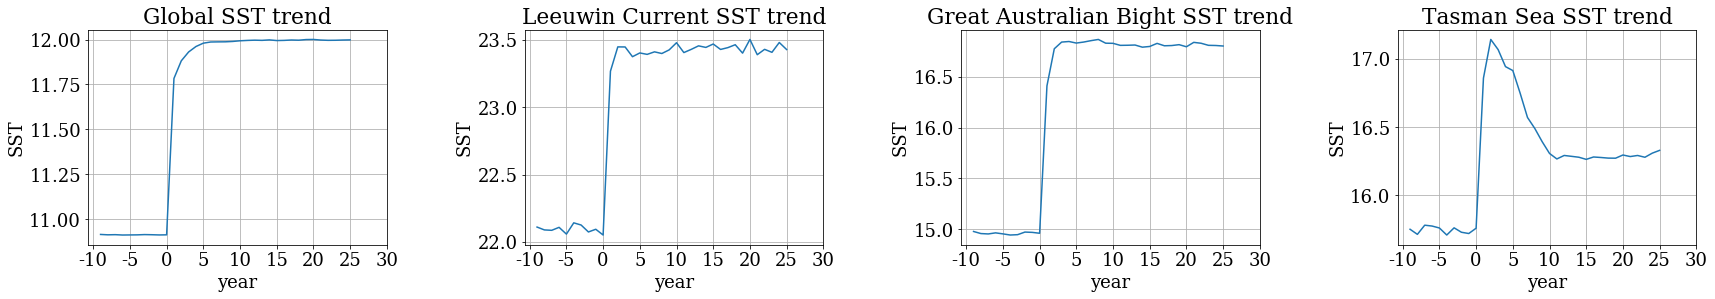

In [18]:
%%time

matplotlib.rcParams.update({'font.size': 18}) 
row = 1
col = 4
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(24,5)


##
ax = plt.subplot(row,col,1)
sst_all.plot()
plt.title('Global SST trend')
# plt.ylim([-1.3, 1.3])
# plt.yticks(np.arange(-1,1.5,0.5))
plt.xticks(np.arange(-1,40,5), np.arange(-10,40,5))
ax.grid()
# slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_LC_anom[20:])
# plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
# plt.text(20, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')


##
ax = plt.subplot(row,col,2)
sst_LC.plot()
plt.title('Leeuwin Current SST trend')
# plt.ylim([-1.3, 1.3])
# plt.yticks(np.arange(-1,1.5,0.5))
plt.xticks(np.arange(-1,40,5), np.arange(-10,40,5))
ax.grid()
# slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_LC_anom[20:])
# plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
# plt.text(20, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')

# ax = plt.subplot(row,col,4)
# taux_LC_anom.plot()
# plt.title('Leeuwin Current TAU X anomaly')
# plt.ylim([-0.03, 0.03])
# plt.yticks(np.arange(-0.02,0.03,0.01))
# plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
# ax.grid()
# slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], taux_LC_anom[20:])
# plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
# plt.text(5, -0.025, '$' + str(np.round(slope*20,3)) + 'm^{2} s \cdot 20 yrs^{-1}$')

##
ax = plt.subplot(row,col,3)
sst_GAB.plot()
plt.title('Great Australian Bight SST trend')
# plt.ylim([-1.3, 1.3])
# plt.yticks(np.arange(-1,1.5,0.5))
plt.xticks(np.arange(-1,40,5), np.arange(-10,40,5))
ax.grid()
# slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_GAB_anom[20:])
# plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
# plt.text(20, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')


# ax = plt.subplot(row,col,5)
# taux_GAB_anom.plot()
# plt.title('Great Australian Bight TAU X anomaly')
# plt.ylim([-0.03, 0.03])
# plt.yticks(np.arange(-0.02,0.03,0.01))
# plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
# ax.grid()
# slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], taux_GAB_anom[20:])
# plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
# plt.text(5, -0.025, '$' + str(np.round(slope*20,3)) + 'm^{2} s \cdot 20 yrs^{-1}$')


##
ax = plt.subplot(row,col,4)
sst_TS.plot()
plt.title('Tasman Sea SST trend')
# plt.ylim([-1.3, 1.3])
# plt.yticks(np.arange(-1,1.5,0.5))
plt.xticks(np.arange(-1,40,5), np.arange(-10,40,5))
ax.grid()
# slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], sst_TS_anom[20:])
# plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
# plt.text(20, 1, '$' + str(np.round(slope*20,2)) + '^{\circ}C \cdot 20 yrs^{-1}$')


# ax = plt.subplot(row,col,6)
# taux_TS_anom.plot()
# plt.title('Tasman Sea TAU X anomaly')
# plt.ylim([-0.03, 0.03])
# plt.yticks(np.arange(-0.02,0.03,0.01))
# plt.xticks(np.arange(2,70,10), np.arange(1960,2020,10))
# ax.grid()
# slope, intercept, r_value, p_value, std_err = stats.linregress(years[20:], taux_TS_anom[20:])
# plt.plot([19, 58], [1978*slope+intercept, 2016*slope+intercept], color='black')
# plt.text(5, -0.025, '$' + str(np.round(slope*20,3)) + 'm^{2} s \cdot 20 yrs^{-1}$')


fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_.png', bbox_inches='tight', dpi=200)




In [42]:
sst_ctrl_10y = sst[:10,:,:].\
    mean(dim=('year'))
print(sst_ctrl_10y.shape)
print(sst_ctrl_10y)

sst_5069_10y = sst[-10:,:,:].\
    mean(dim=('year'))
print(sst_5069_10y.shape)
print(sst_5069_10y)


# sst_ctrl_10y = sst.\
#     sel(year=slice(0,9)).\
#     mean(dim=('year'))
# print(sst_ctrl_10y.shape)
# print(sst_ctrl_10y)

# sst_5069_10y = sst[-10:,:,:].\
#      sel(year=slice(25,34)).\
#     mean(dim=('year'))
# print(sst_5069_10y.shape)
# print(sst_5069_10y)




(2028, 2880)
<xarray.DataArray 'SST' (yt: 2028, xt: 2880)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * xt       (xt) float64 -279.9 -279.9 -279.7 -279.6 -279.4 -279.4 -279.2 ...
  * yt       (yt) float64 -81.08 -81.08 -80.97 -80.97 -80.87 -80.87 -80.76 ...
(2028, 2880)
<xarray.DataArray 'SST' (yt: 2028, xt: 2880)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * xt       (xt) float64 -279.9 -279.9 -279.7 -279.6 -279.4 -279.4 -279.2 ...
  * yt       (yt) float64 -81.08 -8

(2, 1080, 1440)


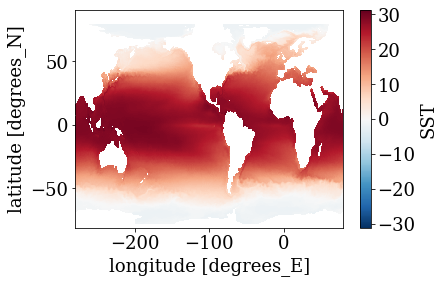

In [39]:
test = xr.open_dataset(
    '/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output477/ice_month.nc', decode_times=False).\
            SST.mean(dim='time')

test2 = xr.open_dataset(
    '/g/data/v45/pas561/mom/archive/gfdl_nyf_1080/output478/ice_month.nc', decode_times=False).\
            SST.mean(dim='time')


test = xr.concat([
                test,
                test2
            ], 'year'
            )


print(test.shape)

sst[1,:,:].plot()

CPU times: user 1.65 s, sys: 2.47 s, total: 4.12 s
Wall time: 3.73 s


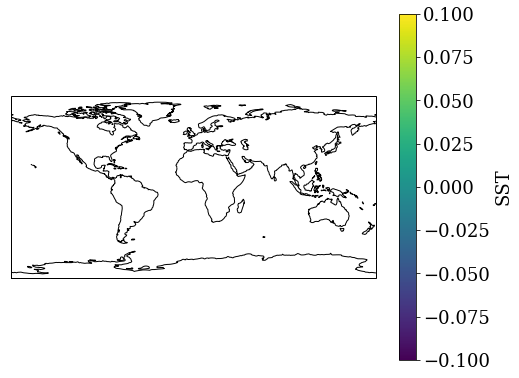

In [43]:
%%time

matplotlib.rcParams.update({'font.size': 18}) 
row = 2
col = 2
plt.rc('text', usetex=False)
plt.rc('font', family='serif')


plt.close('all')
fig = plt.figure() 
fig.set_size_inches(18,14)

##
ax = plt.subplot(row,col,1, projection=ccrs.PlateCarree())
# ax.coastlines()
# cmap = 'plasma'
# step = 0.1
# contf_lvls = np.arange(-1,1+1e-08,step)
sst_anom_10y = sst_5069_10y - sst_ctrl_10y
sst_anom_10y.plot()
# plt.title('Sea surface temp ' + str(years[fid]))
# ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
# ax.grid()
# plt.plot(
#     [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
#     [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
# plt.plot(
#     [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
#     [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
# plt.plot(
#     [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
#     [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])

# ax = plt.subplot(row,col,2, projection=ccrs.PlateCarree())
# ax.coastlines()
# cmap = 'RdBu_r'
# step = 0.05
# contf_lvls = np.arange(-0.25,0.25+1e-08,step)
# taux[:,:,fid].plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
# plt.title('Surface zonal wind stress ' + str(years[fid]))
# ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
# ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
# ax.grid()
# plt.plot(
#     [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
#     [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
# plt.plot(
#     [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
#     [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
# plt.plot(
#     [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
#     [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])

    ##
#     ax = plt.subplot(row,col,3, projection=ccrs.PlateCarree())
#     ax.coastlines()
#     cmap = 'seismic'
#     step = 0.2
#     contf_lvls = np.arange(-1,1+1e-08,step) 
#     sst_anom = sst[:,:,fid] - sst.mean(dim='year')
#     sst_anom.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
#     plt.title('SST anomaly ' + str(years[fid]) + ' - 1958 to 2016 mean')
#     ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
#     ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
#     ax.grid()
#     plt.plot(
#         [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
#         [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
#     plt.plot(
#         [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
#         [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
#     plt.plot(
#         [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
#         [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])

#     ax = plt.subplot(row,col,4, projection=ccrs.PlateCarree())
#     ax.coastlines()
#     cmap = 'seismic'
#     step = 0.01
#     contf_lvls = np.arange(-0.05,0.05+1e-08,step)
#     taux_anom = taux[:,:,fid] - taux.mean(dim='year')
#     taux_anom.plot.contourf(levels=contf_lvls, cmap=cmap, extend='both')
#     plt.title('TAU X anomaly ' + str(years[fid]) + ' - 1958 to 2016 mean')
#     ax.set_xticks(np.arange(100,170,10), crs=ccrs.PlateCarree())
#     ax.set_yticks(np.arange(-70,-10,10), crs=ccrs.PlateCarree())
#     ax.grid()
#     plt.plot(
#         [lon_LC[0], lon_LC[1], lon_LC[1], lon_LC[0], lon_LC[0]],
#         [lat_LC[0], lat_LC[0], lat_LC[1], lat_LC[1], lat_LC[0]])
#     plt.plot(
#         [lon_GAB[0], lon_GAB[1], lon_GAB[1], lon_GAB[0], lon_GAB[0]],
#         [lat_GAB[0], lat_GAB[0], lat_GAB[1], lat_GAB[1], lat_GAB[0]])
#     plt.plot(
#         [lon_TS[0], lon_TS[1], lon_TS[1], lon_TS[0], lon_TS[0]],
#         [lat_TS[0], lat_TS[0], lat_TS[1], lat_TS[1], lat_TS[0]])

#     fig.tight_layout(rect=[0, 0, 1, 0.90])

#     output_ls = os.listdir(figures_path)
#     if not script_name:
#         script_name = 'test'
#     elif script_name not in output_ls:
#         os.mkdir(figures_path + '/' + script_name)
#     plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
#                 + '_fig1_' + str(years[fid]) + '.png', bbox_inches='tight', dpi=200)
    
#     print(str(years[fid]) + ' OK')



In [34]:
! ls /g/data/e14/erd561/mom/gfdl_nyf_1080_hist_5069/archive


output501  output505  output509  output513  output517  output521  output525
output502  output506  output510  output514  output518  output522
output503  output507  output511  output515  output519  output523
output504  output508  output512  output516  output520  output524
